In [30]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [31]:
CorrelationLensed = np.load("./ksz_reconstruction/NS_512_R_2048_P_2048_DV_64_Lens_True.z-0.40-0.50/corr_coeffNS_512_R_2048_P_2048_DV_64_Lens_True.npy")
CorrelationNotLensed = np.load("./ksz_reconstruction/NS_512_R_2048_P_2048_DV_64_Lens_False.z-0.40-0.50/corr_coeffNS_512_R_2048_P_2048_DV_64_Lens_False.npy")

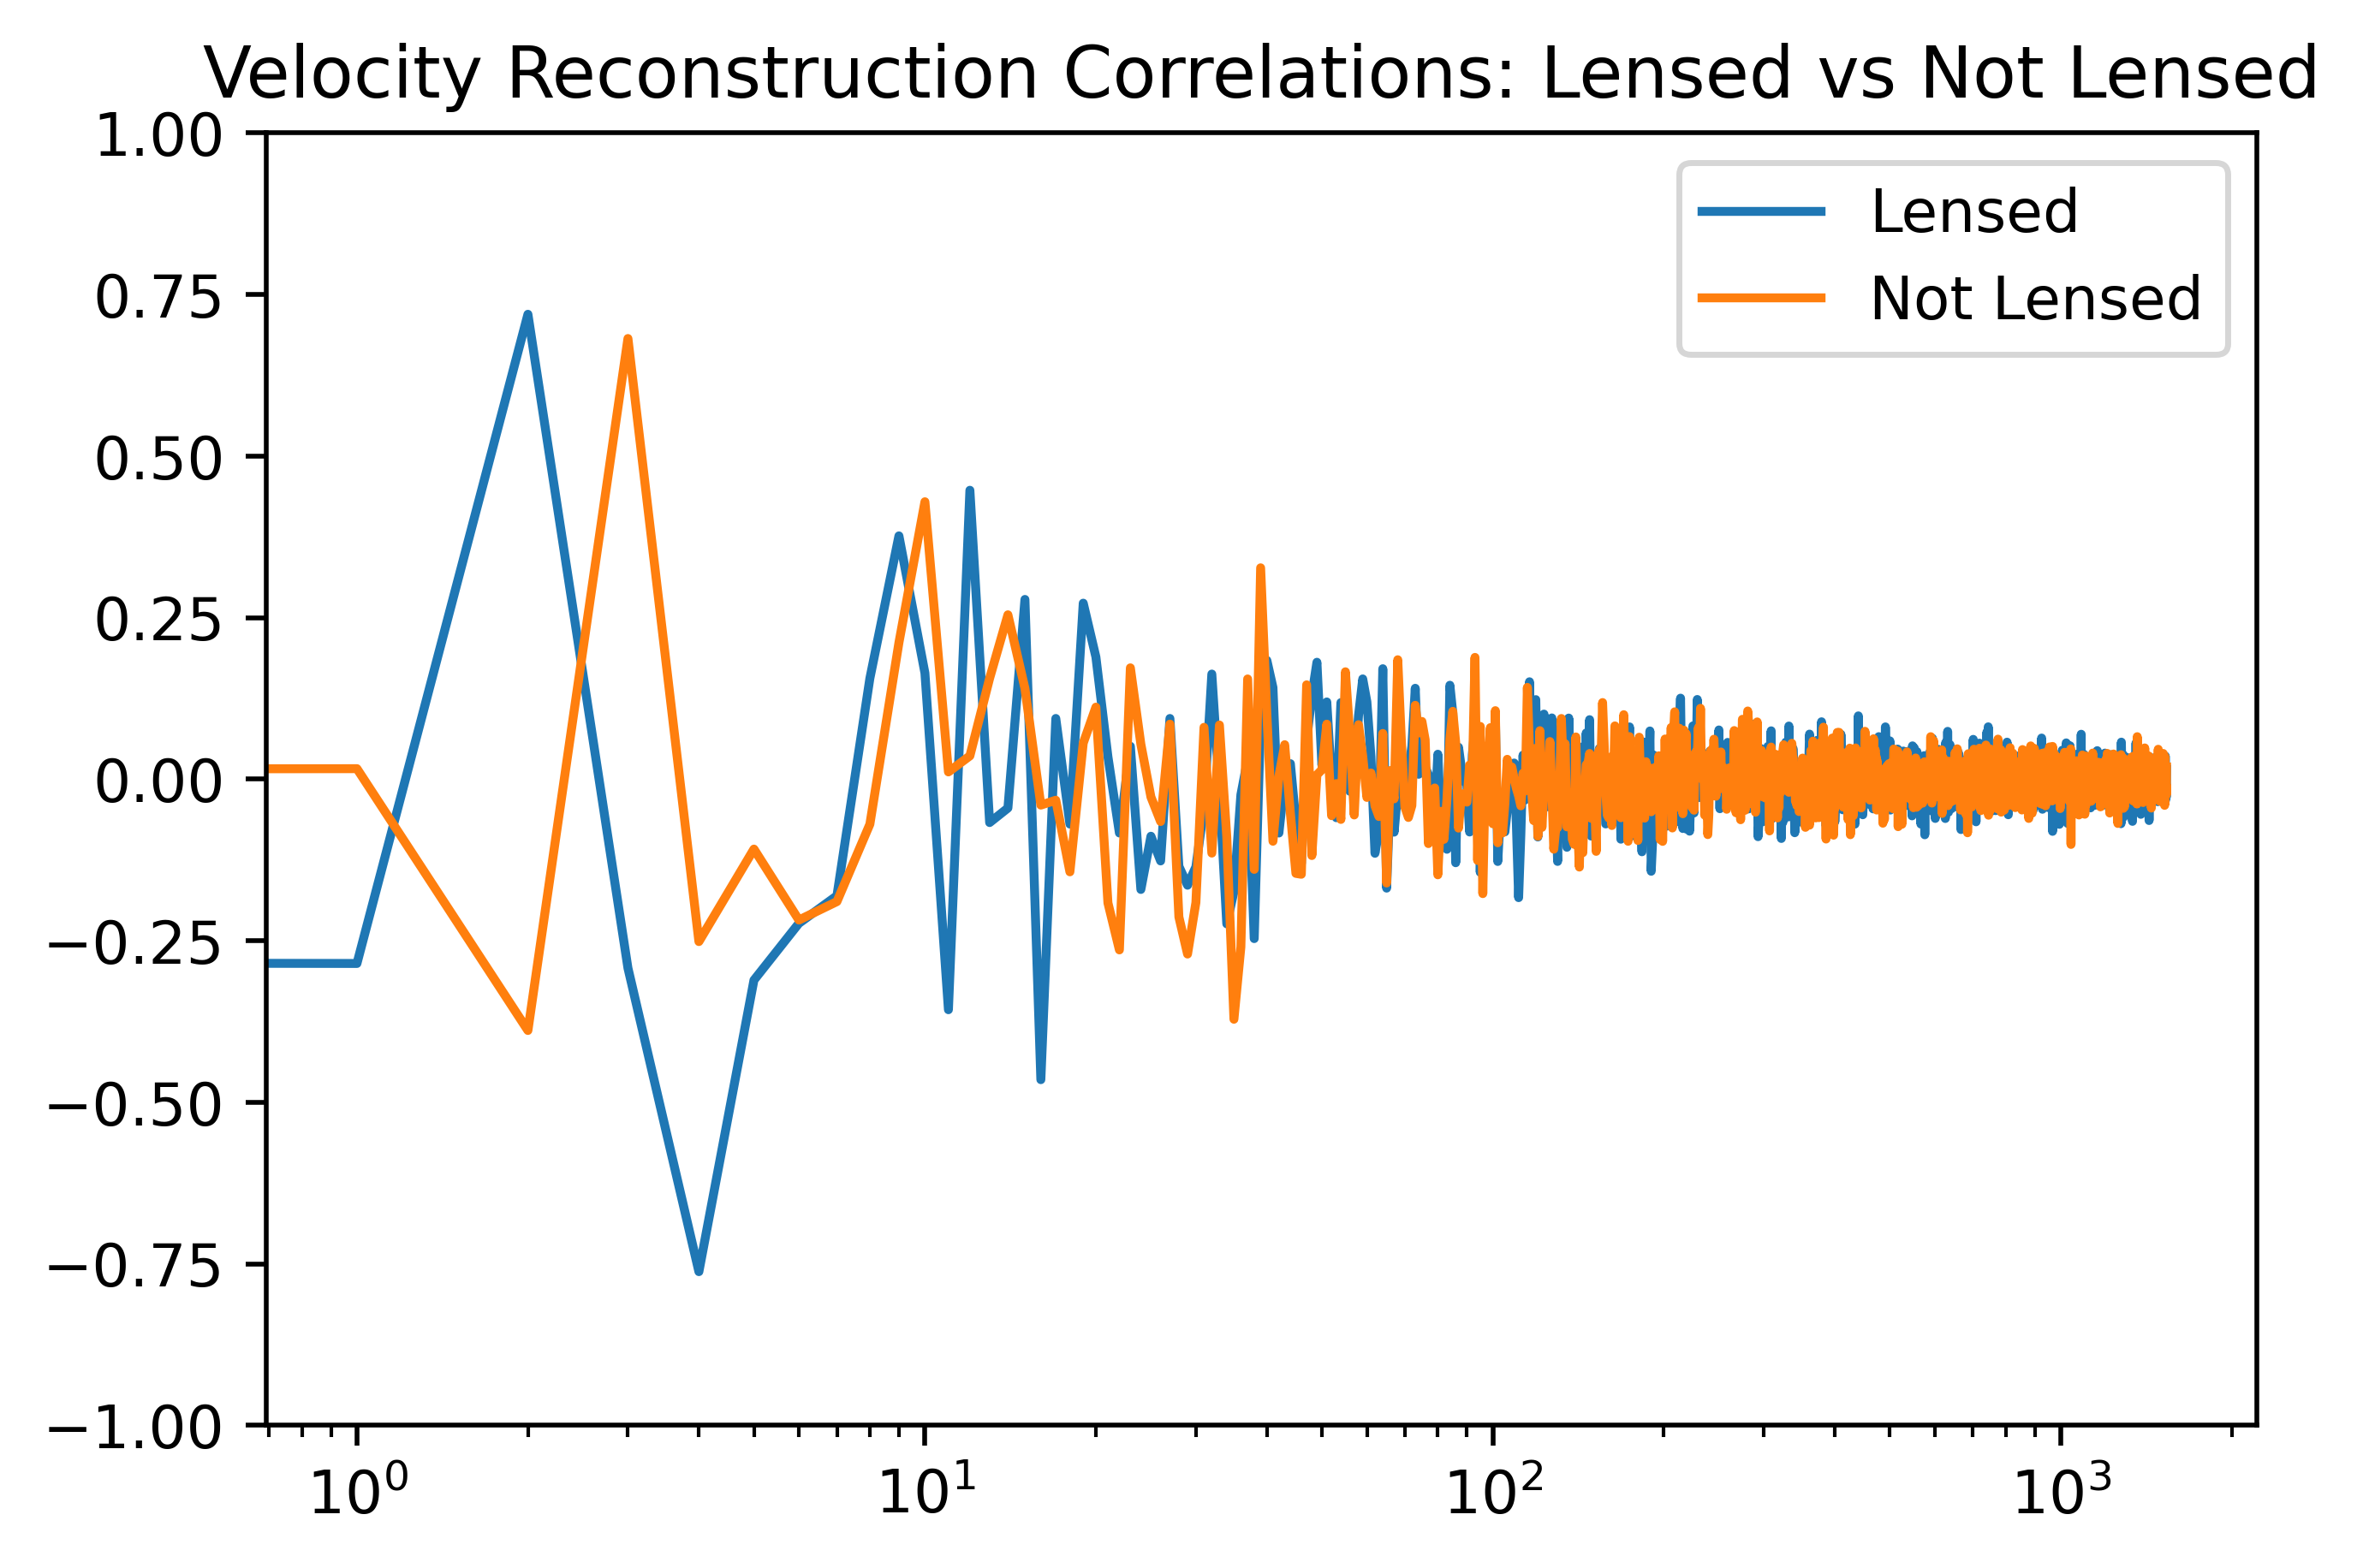

In [33]:
plt.figure(dpi=500)
plt.semilogx( CorrelationLensed, label="Lensed")
plt.semilogx( CorrelationNotLensed, label="Not Lensed")
plt.ylim(-1,1)
plt.title("Velocity Reconstruction Correlations: Lensed vs Not Lensed")
plt.legend();

# Generating CMB

In [4]:
import camb

In [5]:
pars = camb.CAMBparams()

In [6]:
pars.set_cosmology(H0=100.0*h, ombh2=0.048*h**2, omch2=0.262*h**2, mnu=0.06, omk=0)
pars.InitPower.set_params(As=2e-9, ns=0.96, r=0)
pars.set_for_lmax(6144, lens_potential_accuracy=0)

In [7]:
#calculate results for these parameters
results = camb.get_results(pars)

In [13]:
powers =results.get_cmb_power_spectra(pars, CMB_unit='K')

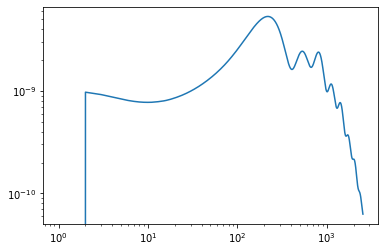

In [21]:
plt.loglog(powers['total'][:,0])

In [24]:
fakeCMB = hp.synfast(powers['total'][:,0],nside=512);

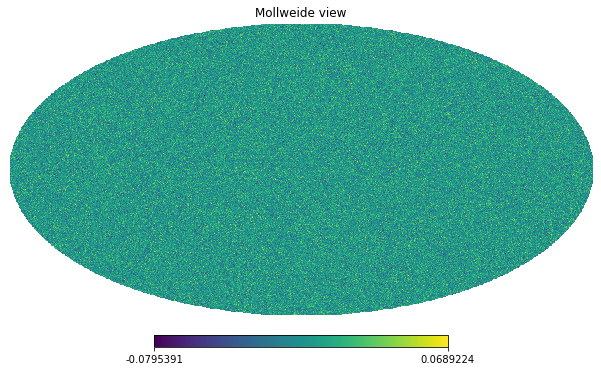

In [28]:
hp.mollview(fakeCMB);